# Kmeans cluster

This part will do the Kmean cluster to get which color is most dominant in the picture

In [167]:
from skimage.color import rgb2gray, rgb2lab, deltaE_cie76
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from scipy import ndimage
from sklearn.cluster import KMeans
from collections import Counter

In [168]:
#Color identification - RGB to Hex Conversion
def RGB2HEX255(color):
    #return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))    
    return "#{:02x}{:02x}{:02x}".format(color[0], color[1], color[2])

In [229]:
WINDOW_NAME = "win"
def swap2images(image1, image2):
    """ Display an image with cv2 replace with another image
    for X seconds. can show contrast between 
    """
    cv2.namedWindow(WINDOW_NAME)
    initialtime = time.time()

    cv2.startWindowThread()

    while (time.time() - initialtime < 8):
        cv2.imshow(WINDOW_NAME, image1)
        cv2.waitKey(500)
        cv2.imshow(WINDOW_NAME, image2)
        cv2.waitKey(500)
    #print ("before first waitkey(1)")
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    #print ("before second waitkey(1)")
    cv2.waitKey(1)
    return(1)


In [170]:
def ColorClusterPieOld(pie_labels, pie_center_colors):
    """
    This function will perform the K mean and display it into to the pie chart
    
    params:
        labels: the list of labels available in the image
    """
    counts = Counter(pie_labels)
    print(counts)
    #center_colors = kmeans.cluster_centers_
    ordered_colors = [pie_center_colors[i] for i in counts.keys()]
    print(ordered_colors)
    hex_colors = [RGB2HEX255(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = ordered_colors, colors = hex_colors)
    return rgb_colors
    

In [171]:
def ColorClusterPie(pie_labels, pie_center_colors):
    """
    This function will perform the K mean and display it into to the pie chart
    
    params:
        labels: the list of labels available in the image
    """
    # Count the frequency of each label/color
    label_counts = np.bincount(pie_labels)

    # Create a list of (label, frequency) tuples
    label_freq_pairs = [(label, count) for label, count in enumerate(label_counts)]

    # Sort the list by frequency in descending order
    label_freq_pairs.sort(key=lambda x: x[1], reverse=True)

    # Create a sorted ndarray of Center-colors based on label frequency
    sorted_center_colors = np.array([pie_center_colors[label] for label, _ in label_freq_pairs])

    # Extract the frequencies and labels from the sorted pairs
    frequencies = [freq for _, freq in label_freq_pairs]
    color_labels = [f'Color {i}' for i in range(len(label_freq_pairs))]

    # Plot the pie chart
    plt.pie(frequencies, labels=color_labels, colors=sorted_center_colors/255.0, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures circular pie
    plt.show()
 
    return sorted_center_colors
    

In [238]:
"""
Given an RGB image, replace one of the colors with an RGB value to be replaced
Plot the result
"""
def replaceAColor (image, target_rgb, replacement_rgb):
    # the images that will have a color replaced
    color_deleted_image = np.uint8(image)

    # Find indices where target_rgb occurs in the image
    indices = np.where(np.all(color_deleted_image == target_rgb, axis=-1))

    # Replace the values at the indices with replacement_rgb
    color_deleted_image[indices] = replacement_rgb

    #swap2images(np.uint8(new_float_img_array), color_deleted_image)
    #rgb_ordered_colors = ColorClusterPie(labels, center_colors)
    # plotting a line plot after changing it's width and height
    #plt.figure(figsize = (10, 8))
    #plt.imshow(color_deleted_image)
    return color_deleted_image

# not working!!! replace a list of different colors with a color
def replaceMultipleColors (image, target_rgb_list, replacement_rgb):
    color_deleted_image = np.uint8(image)
    for target_rgb in target_rgb_list:
        color_deleted_image = replaceAColor (color_deleted_image, target_rgb, replacement_rgb)
    return color_deleted_image

def replaceAllButOneColor(image, unchanged_rgb, replacement_rgb):  
     # the images that will have a color replaced
    color_deleted_image = np.uint8(image)

    # Find indices where target_rgb occurs in the image
    indices = np.where(np.all(color_deleted_image != unchanged_rgb, axis=-1))

    # Replace the values at the indices with replacement_rgb
    color_deleted_image[indices] = replacement_rgb

    #swap2images(np.uint8(new_float_img_array), color_deleted_image)
    #rgb_ordered_colors = ColorClusterPie(labels, center_colors)
    # plotting a line plot after changing it's width and height
    #plt.figure(figsize = (10, 8))
    #plt.imshow(color_deleted_image)
    return color_deleted_image


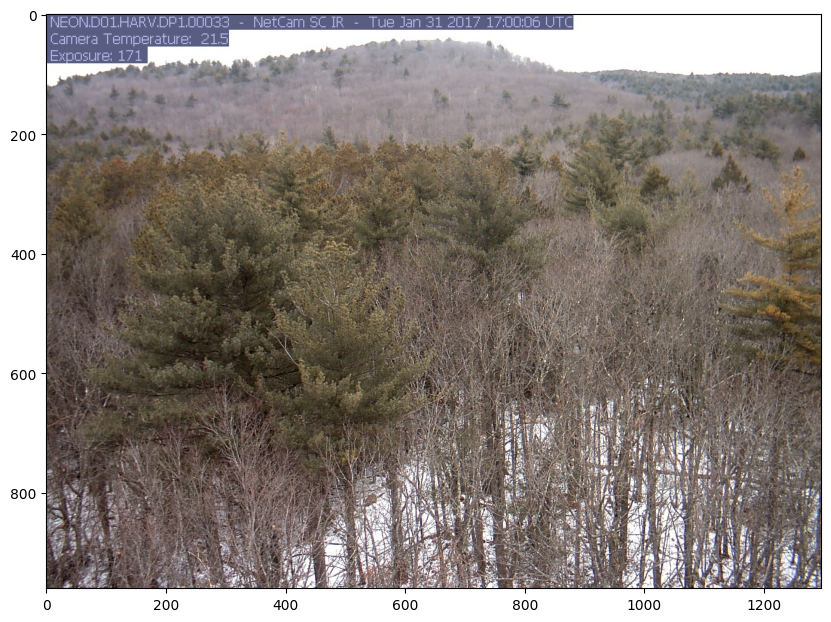

In [217]:
def readimg():
    """
        This function will read and show the image and also return it
    """
#    image = plt.imread('../data_raw/NEON.D01.HARV.DP1.00033/2017/01/NEON.D01.HARV.DP1.00033_2017_01_31_120006.jpg')/255
#    image = plt.imread('../data_raw/NEON.D01.HARV.DP1.00033/2017/01/NEON.D01.HARV.DP1.00033_2017_01_31_120006.jpg')/255
    image = plt.imread('../data_raw/NEON.D01.HARV.DP1.00033/2017/01/NEON.D01.HARV.DP1.00033_2017_01_31_120006.jpg')
    #image = plt.imread('../data_raw/Red,_green_and_blue,_overlapping_basic_colors.jpg')
    plt.figure(figsize = (10, 8))
    plt.imshow(image)
    return image
pic_array = readimg()

In [218]:
#import numpy as np
#from sklearn.cluster import KMeans
from PIL import Image as im

#plt.imshow(pic)
# Load the image
#img = Image.open("example.jpg")

# Convert the image to a numpy array
#img_array = np.array(pic)
img_array = pic_array

# Reshape the array to a 2D array of pixels (rows) by color channels (columns)
OneDpixelsbycolor = img_array.reshape(-1, 3)

# Set the number of clusters
n_clusters = 20

# Perform K-means clustering on the pixel data
#kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(1Dpixelsbycolor)
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(OneDpixelsbycolor)
fit_model = kmeans.fit(OneDpixelsbycolor)
# Replace each pixel's color values with the corresponding cluster center
new_pixel_colors = np.array([kmeans.cluster_centers_[label] for label in kmeans.labels_])

# Reshape the pixel array back into the original image shape
new_float_img_array = new_pixel_colors.reshape(img_array.shape)

#swap2images(pic_array, np.uint8(new_float_img_array))

# Convert the pixel array back to an image
clustered_img = im.fromarray(np.uint8(new_float_img_array))

# Save the new image
clustered_img.save("example_clustered.jpg")



In [219]:
swap2images(pic_array,np.uint8(new_float_img_array))

1

In [203]:
"""
print(kmeans.labels_)
print(kmeans.labels_.shape)
print(np.uint8([kmeans.cluster_centers_[0]]))
print(np.uint8([kmeans.cluster_centers_[1]]))
print(np.uint8([kmeans.cluster_centers_[2]]))
print (new_float_img_array.shape)

"""

'\nprint(kmeans.labels_)\nprint(kmeans.labels_.shape)\nprint(np.uint8([kmeans.cluster_centers_[0]]))\nprint(np.uint8([kmeans.cluster_centers_[1]]))\nprint(np.uint8([kmeans.cluster_centers_[2]]))\nprint (new_float_img_array.shape)\n\n'

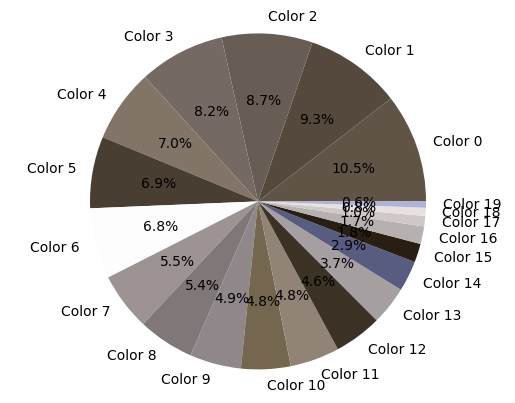

In [220]:
"""
This module will present a pie chart of the relative frequency of pixels of the center colors 
of the kmeans clusters.
"""
center_colors = np.uint8(kmeans.cluster_centers_)

# Get the labels of the K-means clusters
labels = kmeans.labels_

# Reduce to a 2D array.. just a list of tuples
twoDuint_img_array = np.uint8(new_float_img_array.reshape(-1,3))
#swap2images(pic_array, np.uint8(new_float_img_array))

# Get the frequencies of the center colors
unique_colors, color_counts = np.unique(twoDuint_img_array, axis=0, return_counts=True)

rgb_ordered_colors = ColorClusterPie(labels, center_colors)

In [193]:
"""
# Given an RGB image, replace one of the colors with an RGB value to be replaced

#pick the first color [0]
target_rgb = rgb_ordered_colors[0]

# the images that will have a color replaced
color_deleted_image = np.uint8(new_float_img_array)

# RGB value to replace with
replacement_rgb = np.array([254, 254, 254], dtype=np.uint8)

# Find indices where target_rgb occurs in the image
indices = np.where(np.all(color_deleted_image == target_rgb, axis=-1))

# Replace the values at the indices with replacement_rgb
color_deleted_image[indices] = replacement_rgb

swap2images(np.uint8(new_float_img_array), color_deleted_image)
#rgb_ordered_colors = ColorClusterPie(labels, center_colors)
plt.imshow(color_deleted_image)
"""

'\n# Given an RGB image, replace one of the colors with an RGB value to be replaced\n\n#pick the first color [0]\ntarget_rgb = rgb_ordered_colors[0]\n\n# the images that will have a color replaced\ncolor_deleted_image = np.uint8(new_float_img_array)\n\n# RGB value to replace with\nreplacement_rgb = np.array([254, 254, 254], dtype=np.uint8)\n\n# Find indices where target_rgb occurs in the image\nindices = np.where(np.all(color_deleted_image == target_rgb, axis=-1))\n\n# Replace the values at the indices with replacement_rgb\ncolor_deleted_image[indices] = replacement_rgb\n\nswap2images(np.uint8(new_float_img_array), color_deleted_image)\n#rgb_ordered_colors = ColorClusterPie(labels, center_colors)\nplt.imshow(color_deleted_image)\n'

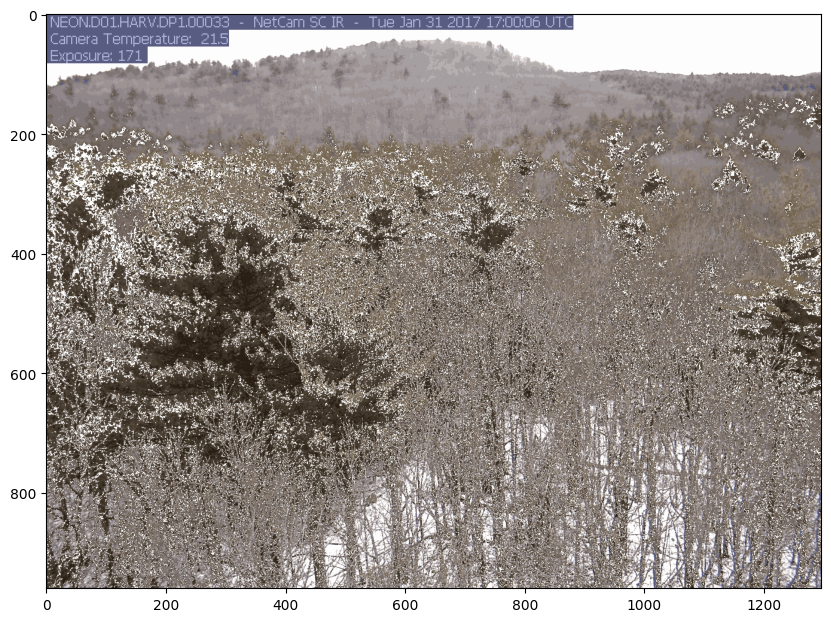

In [221]:

color_replaced_image0 = replaceAColor (new_float_img_array, rgb_ordered_colors[0], np.array([254, 254, 254], dtype=np.uint8))

# note color 0 of harvard is most evergreens

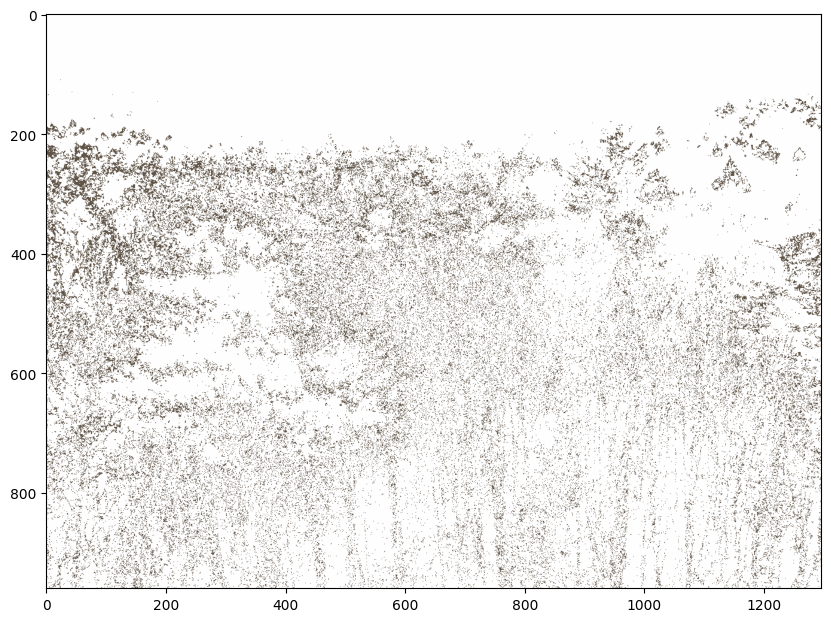

In [228]:

color_replaced_imageExcept0 = replaceAllButOneColor(new_float_img_array, 
                       rgb_ordered_colors[0], 
                       np.array([254, 254, 254], dtype=np.uint8))
                      

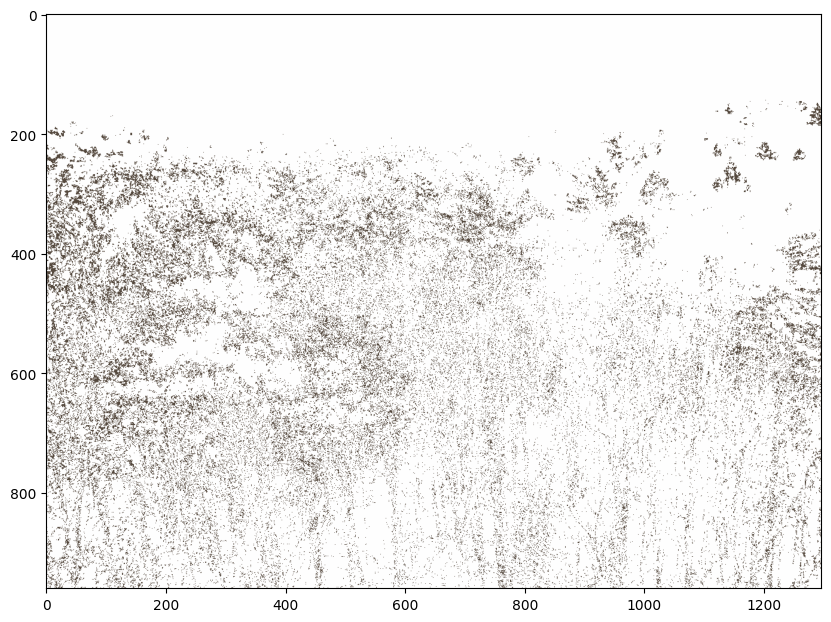

In [230]:

color_replaced_imageExcept1 = replaceAllButOneColor(new_float_img_array, 
                       rgb_ordered_colors[1], 
                       np.array([254, 254, 254], dtype=np.uint8))
                      

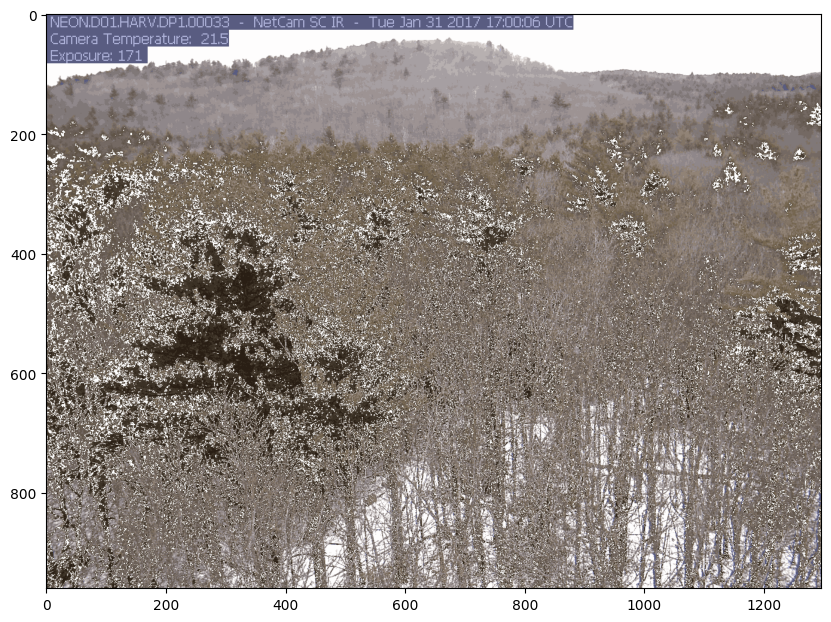

In [246]:

color_replaced_image1 = replaceAColor (new_float_img_array, 
                                       rgb_ordered_colors[1], 
                                       np.array([254, 254, 254], dtype=np.uint8))
plt.figure(figsize = (10, 8))
plt.imshow(color_replaced_image1)
#swap2images(pic_array, np.uint8(color_replaced_image12))


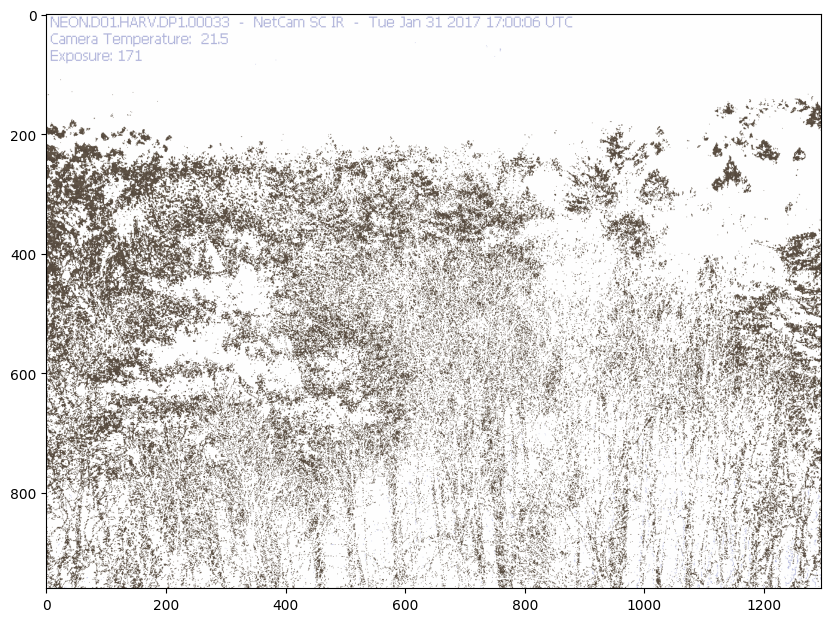

In [239]:

# not working maybe
color_replaced_image0and1 = replaceMultipleColors (new_float_img_array, 
                                                   rgb_ordered_colors[2:19], 
                                                   np.array([254, 254, 254], dtype=np.uint8))
plt.figure(figsize = (10, 8))
plt.imshow(color_replaced_image0and1)

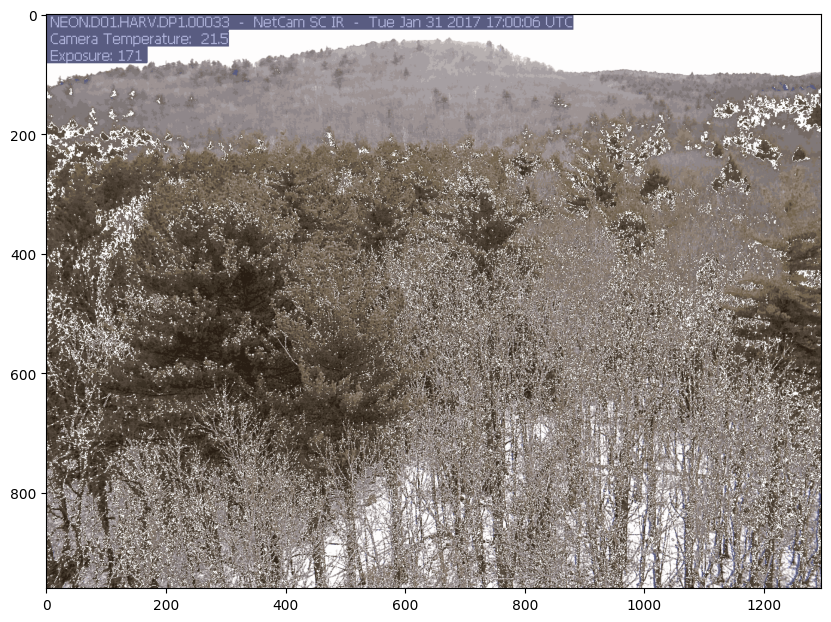

In [224]:

color_replaced_image2 = replaceAColor (new_float_img_array, rgb_ordered_colors[2], np.array([254, 254, 254], dtype=np.uint8))


In [223]:
swap2images(color_replaced_image0, color_replaced_image1)


1

In [178]:
print ("unique_colors Shape:", unique_colors.shape)
print ("color_counts.shape", color_counts.shape)
print (center_colors.shape)
print (twoDuint_img_array.shape)
print (labels.shape)
# Print the frequency of the center colors
for i, color in enumerate(center_colors):
    print(f"Color {i+1}: {color} - Frequency: {center_counts[i]}")    
    

unique_colors Shape: (8, 3)
color_counts.shape (8,)
(8, 3)
(838656, 3)
(838656,)
Color 1: [253   1 252] - Frequency: 1
Color 2: [0 0 0] - Frequency: 1
Color 3: [  0 253   1] - Frequency: 1


IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
# Define the color ranges to be converted from the kmean centers
lower_blue = (100, 0, 0)
upper_blue = (255, 50, 50)

# Convert the blue pixels to green pixels
mask = cv2.inRange(img, lower_blue, upper_blue)
img[mask > 0] = (0, 255, 0)

# Display the image
cv2.imshow('Converted Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# Convert the RGB array to BGR format
bgr_array = cv2.cvtColor(rgb_array, cv2.COLOR_RGB2BGR)
# Convert the ndarray to JPEG format and save it to disk
cv2.imwrite('image.jpg', pic_array)

True

ValueError: Invalid RGBA argument: '#4dac423c368c'

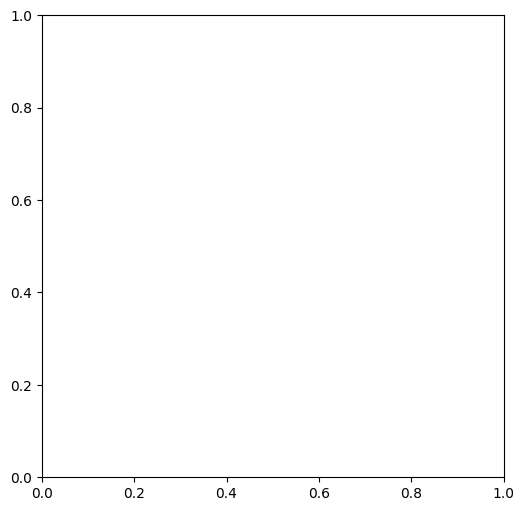

In [110]:
def countLabels(labels):
    """
    This function will perform the K mean and display it into to the pie chart
    
    params:
        labels: the list of labels available in the image
    """
    counts = Counter(labels)
    center_colors = kmeans.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors
    
countLabels(fit_model.labels_)

In [ ]:
#convert the image to gray

gray = rgb2gray(pic)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
gray_mean = gray_r.mean()
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_mean:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
gray = rgb2gray(pic)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_mean:
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

In [ ]:
#perform the K mean with 5 clusters

kmeans = KMeans(n_clusters=12, random_state=0)
fit_model = kmeans.fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [ ]:
cluster_pic[400][500]

# pie chart analyze image color

In [ ]:
#Color identification - RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]*255), int(color[1]*255), int(color[2]*255))

In [ ]:
def countLabels(labels):
    """
    This function will perform the K mean and display it into to the pie chart
    
    params:
        labels: the list of labels available in the image
    """
    counts = Counter(labels)
    center_colors = kmeans.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors
    
countLabels(fit_model.labels_)

# Making bigger window to check if it still works

In [ ]:
from PIL import Image

In [ ]:
old_image = Image.open("../data_raw/GUAN/NEON.D04.GUAN.DP1.00033.jpg").convert('RGB')
# im1 = old_image.split()
# im1[0].show()
# im1[1].show()
# im1[2].show()

In [ ]:
def downsize_img(image):
    """
        downsize_img will traverse the pixel of the image and calculate the average
        value of a block in order to put it in the image
        
        image: an numpy array of m * n image of rgb value, dimension is m*n*3
        block_h: an integer that specifies how many pixel you want a block height to be
        block_w: an integer that specifies how many pixel you want a block width to be
    """
    im_h, im_w = image.shape[:2]
    block_h, block_w = 5, 5
    new_img = np.zeros((im_h//block_h, im_w//block_w, 3))
    for row in np.arange(im_h-block_h+1, step=block_h):
        for col in np.arange(im_w-block_w+1, step=block_w):
            new_img[row//block_h, col//block_w] = np.mean(image[row: row+block_h, col: col+block_w, :], axis = (0,1))
    return new_img

In [ ]:
#convert old image into numpy array in order to downsize it
old_img = np.asarray(old_image)
# downsize the old image into new image
new_img = downsize_img(old_img)

In [ ]:
# convert the new image from numpy array back to RGB
Image.fromarray((new_img*1).astype(np.uint8)).convert('RGB')

In [ ]:
def calculate_green_density(image, show_img = False):
    """
        calculate_green_density will calculate the density of the
        different shades of green appear in the image. THis function
        will also produce a new image that contains all the shades of
        green in the image for checking. 
        
        image, which is the numpy array representing the RGB image
        show_img is the boolean if we want to show the image with green mask
    """
    h, w = image.shape[:2]

    hsv = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (36, 25, 25), (170, 255,255))
    
    green = np.zeros_like(image, np.uint8)
    imask = mask > 0
    green[imask] = image[imask]
    
    ####display image
    if show_img:
        plt.imshow(green)
        plt.show()
    
    return np.count_nonzero(mask)/(h*w)

In [ ]:
calculate_green_density(old_img)

In [ ]:
#compare the size of original image and new image dimensions
old_img.shape
new_img.shape

In [ ]:
#calculate green density of new image
calculate_green_density(new_img)

# Apply Kmean to segments (Not working)

In [ ]:
def split_image(image, block_h = 2, block_w = 2):
    """
        split_image will split the image to different block with
        specified height and width
        
        image: an numpy array of m * n image of rgb value, dimension is m*n*3
        block_h: an integer that specifies how many pixel you want a block height to be
        block_w: an integer that specifies how many pixel you want a block width to be
    """
    im_h, im_w = image.shape[:2]
    new_img = np.zeros((im_h//block_h, im_w//block_w, block_h, block_w, 3))
    for row in np.arange(im_h-block_h+1, step = block_h):
        for col in np.arange(im_w-block_w+1, step = block_w):
            new_img[row//block_h, col//block_w] = image[row: row+block_h, col: col+block_w, :]
    return new_img
    

In [ ]:
def get_kMean(pic):
    pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
    kmeans = KMeans(n_clusters=5, random_state=0)
    fit_model = kmeans.fit(pic_n)
#     pic2show = kmeans.cluster_centers_[kmeans.labels_]
#     print(pic2show.shape)
#     cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
#     plt.imshow(cluster_pic)
    return (fit_model, kmeans)

In [ ]:
def countLabels2(labels, kmeans):
    counts = Counter(labels)
    center_colors = kmeans.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

In [ ]:
partitioned = split_image(old_img, 150, 150)

In [ ]:
# def apply_kMean_to_split(splitted):
#     h, w = splitted.shape[:2]
#     models = []
#     for row in np.arange(h):
#         for col in np.arange(w):
#             image = Image.fromarray((splitted[row, col]*1).astype(np.uint8)).convert('RGB')
# #             image.show()

#             vector_img = np.array(image)
# #             img = splitted[row, col]
#             kMeanModel, kmeans = get_kMean(vector_img)
# #             countLabels(kMeanModel.labels_)
# #             print(vector_img.shape)
#             models.append((kMeanModel, kmeans))
#     return models
# models = apply_kMean_to_split(partitioned)

In [ ]:
countLabels2(models[1][0].labels_, models[1][1])

# Find All Color in image

In [ ]:
def find_all_color(image):
    """
        find_all_color(image) will find all the color in image
        @param: image is the image opened as type Image
        @return: a dictionary of key RGB tuple and value count. e.g {(100,20,10):5}
    """
    colorCount = {}
    for pixel in image.getdata():
        colorCount[pixel] = colorCount.get(pixel, 0)+1
    return colorCount

In [ ]:
def top_n_color_img(image, n):
    import heapq
    top = []
    allColor = find_all_color(image)
#     print(allColor)
    for color, count in allColor.items():
        heapq.heappush(top, (count, color))
        if len(top) > n:
            heapq.heappop(top)
    return dict(top)


In [ ]:
lastYearImg = [
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_01_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_02_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_03_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_04_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_05_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_06_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_07_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_08_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_09_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_10_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_11_01.jpg', 
                '../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_12_01.jpg',
              ]

In [ ]:
def color_sep_KMean(image, n):
    """
    This function will separate the images into color into specified K-mean
    
    params:
        image is the image that we want to separate into K mean
        n is the K value of K mean
    """
    img = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
    kmeans=KMeans(n_clusters=n)
    s=kmeans.fit(img)
    labels=list(kmeans.labels_)
    centroid=kmeans.cluster_centers_
#     print(centroid*255)
#     percent=[]
#     for i in range(len(centroid)):
#         j=labels.count(i)
#         j=j/(len(labels))
#         percent.append(j)
#     plt.pie(percent,colors=np.array(centroid),labels=percent)
#     plt.show()
    percent = {}
    for i in range(len(centroid)):
        color = centroid[i]
        colorCount = labels.count(i)
        colorPercent = colorCount/len(labels)
        percent[RGB2HEX(color)] = colorPercent
    return percent

In [ ]:
color_sep_KMean(plt.imread('../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_11_01.jpg')/255, 8)

In [ ]:
def plot_percentage_over_time(img_names):
    """
    This function will perform KMean cluster on the images in the array
    and print out the top K color of a specified month in the year
    
    param: img_names is the array that contain the name of the images
    """
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    colorsPercent = {}
    for i, name in enumerate(img_names):
        img = plt.imread(name)/255
        img_arr = np.asarray(img)*255
        curPercent = color_sep_KMean(img, 8)
        for color in curPercent:
            if color not in colorsPercent:
                colorsPercent[color] = [0]*(i)
            colorsPercent[color].append(curPercent[color])
        for color in colorsPercent:
            while len(colorsPercent[color]) < i+1:
                colorsPercent[color].append(0)
    count = range(1,len(img_names)+1)
    print(len(colorsPercent))
    fig, ax = plt.subplots()
    ax.stackplot(count, colorsPercent.values(), colors=colorsPercent.keys())
    plt.show()
    

In [ ]:
plot_percentage_over_time(lastYearImg)

# Histogram of the color

In [ ]:
def rgb_density_histogram(image): 
    img = plt.imread(image)
    plt.show()

    color = ('b','g','r')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([img],[channel],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.title('Histogram for color scale picture')
    plt.show()

In [ ]:
rgb_density_histogram('../data_raw/HARV/NEON.D01.HARV.DP1.00033_2021_01_01.jpg')

In [ ]:
def greeness_over_time(images):
    """
    This function will calculate the greeness overtime and return the array
    that contains the greeness for each image
    
    Params:
        images: the array of image names that we want to get the img from 
    """
    
    #change this to faslse if you don't want to display the image with 
    #green mask
    display_image = True
    
    greeness = []
    
    for img_name in images:
        img = Image.open(img_name).convert('RGB')
        img_arr = np.asarray(img)
        greeness.append(calculate_green_density(img_arr, display_image))
    return greeness

In [ ]:
greeness_over_time(lastYearImg)